In [1]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms.largest_connected_components import LargestConnectedComponents
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
cora = Planetoid(root='/tmp/CoraLCC', name='Cora', pre_transform=LargestConnectedComponents())
n = cora[0].num_nodes
E = cora.edge_index

Processing...
Done!


In [3]:
G = nx.Graph()
for i in range(n):
    G.add_node(i)
for i in range(E.shape[1]):
    G.add_edge(int(E[0, i]), int(E[1, i]))
A = nx.adjacency_matrix(G).todense()

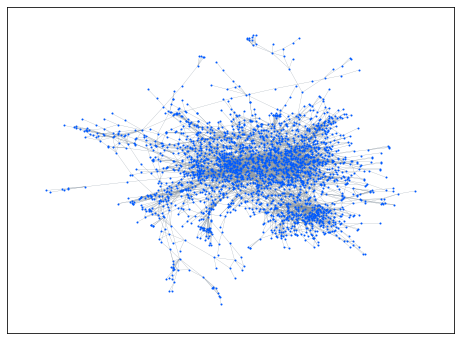

In [4]:
# グラフの描画
pos = nx.spring_layout(G, seed=0)
fig, ax = plt.subplots(figsize=(8, 6))
nx.draw_networkx(G, ax=ax, pos=pos, node_size=1, node_color='#005aff', labels={i: '' for i in range(n)}, edge_color='#84919e', width=0.2)

In [5]:
# 幅優先探索で距離を求める
start = 0
dist = [-1 for i in range(n)]
dist[start] = 0
queue = [start]
while len(queue) > 0:
    x = queue.pop(0)
    for i in range(n):
        if A[x, i] and dist[i] == -1:
            dist[i] = dist[x] + 1
            queue.append(i)

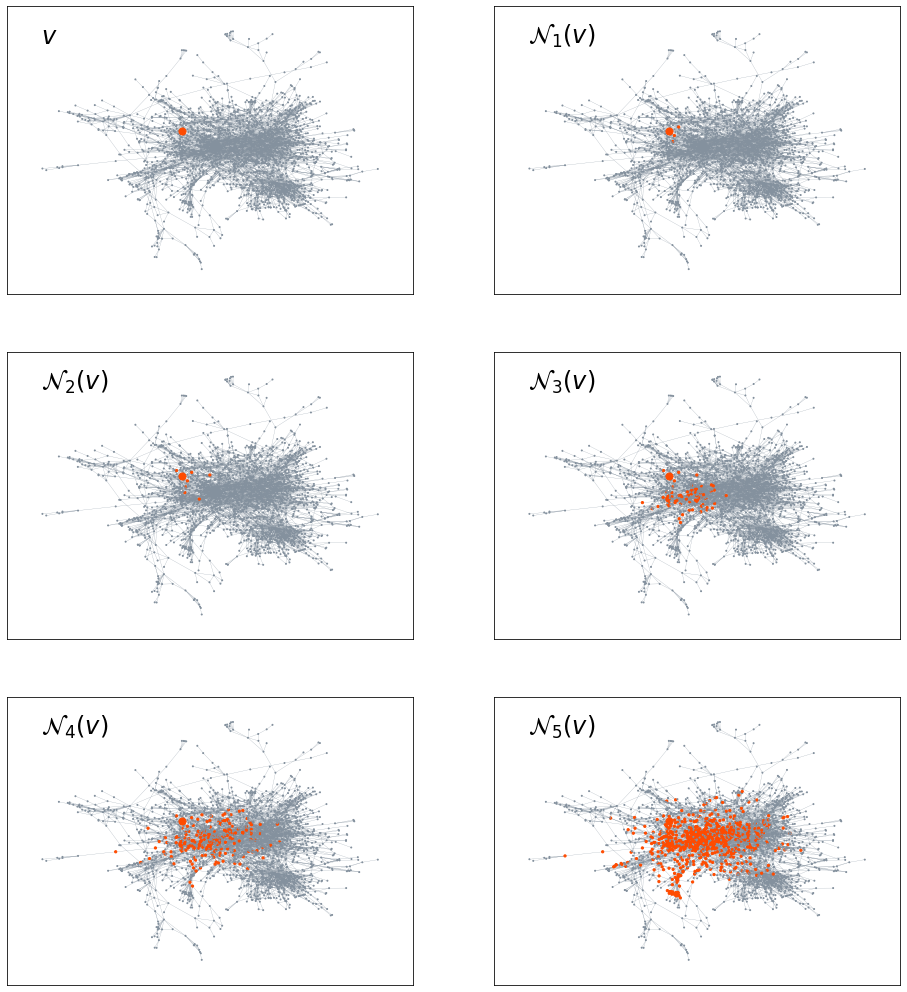

In [6]:
# 距離の可視化
fig = plt.figure(figsize=(16, 18))
for d in range(6):
    ax = fig.add_subplot(3, 2, 1 + d)
    node_color = ['#84919e' for i in range(n)]
    node_size = [1 for i in range(n)]
    for i in range(n):
        if dist[i] <= d:
            node_color[i] = '#ff4b00'
            node_size[i] = 5
    nx.draw_networkx(G, ax=ax, pos=pos, node_size=node_size, node_color=node_color, labels={i: '' for i in range(n)}, edge_color='#84919e', width=0.2)
    ax.scatter([pos[start][0]], [pos[start][1]], s=50, c='#ff4b00', zorder=10)
    if d == 0:
        caption = '$v$'
    else:
        caption = '$\\mathcal{N}_' + str(d) + '(v)$'
    ax.text(-0.9, 0.9, caption, fontfamily='Segoe UI', fontsize=24)